## Geopandas: Mapping the Leipzigs Neighborhoods.

#### Neighborhoods and City Planning
Neighborhoods are the building blocks of bigger cities.

#### Statistical Planning Areas (SPAs)
SPAs provide that formal structure on a neighborhood, and allow City planners to have a framework for data collection and analysis. This helps identify a neighborhoods strengths and weaknesses, and allows for an effective framework for government and private sector investment.

#### Accessing the GeoJSON
The City of Cleveland Open Data has made a GeoJSON file available (click on the download button to access the data formats):
https://static.leipzig.de/

In [4]:
import pandas as pd
import geopandas

file = 'leipzig.geojson'
leipzig = geopandas.read_file(file)

print(leipzig.head())

   FID  STB                                           geometry
0    0  001  POLYGON ((317173.923 5691379.583, 317153.964 5...
1    1  002  POLYGON ((317453.944 5690457.592, 317463.298 5...
2    2  010  POLYGON ((318665.855 5691621.677, 318757.961 5...
3    3  011  POLYGON ((318071.542 5690670.374, 318072.418 5...
4    4  012  POLYGON ((318096.179 5690675.911, 318144.826 5...


In [10]:
neighbourhoods = leipzig.STB.unique()
print(neighbourhoods)

['001' '002' '010' '011' '012' '020' '021' '022' '023' '024' '030' '031'
 '032' '033' '034' '035' '040' '041' '042' '043' '044' '050' '051' '052'
 '053' '054' '060' '061' '062' '100' '101' '102' '103' '104' '105' '106'
 '107' '110' '111' '112' '113' '114' '115' '116' '120' '121' '122' '130'
 '131' '132' '133' '134' '135' '136' '140' '141' '142' '143' '150' '151'
 '152' '200' '201' '202' '203' '204' '205' '206' '210' '211' '212' '213'
 '214' '215' '220' '221' '222' '223' '224' '230' '231' '232' '233' '234'
 '240' '241' '242' '243' '244' '245' '246' '247' '248' '250' '251' '260'
 '261' '262' '270' '271' '272' '273' '280' '281' '290' '291' '292' '300'
 '301' '302' '303' '304' '305' '306' '307' '308' '310' '311' '312' '313'
 '314' '315' '316' '320' '321' '322' '330' '331' '340' '341' '342' '343'
 '350' '351' '352' '353' '400' '401' '402' '403' '404' '405' '406' '407'
 '408' '409' '410' '411' '412' '413' '414' '415' '420' '421' '422' '430'
 '431' '432' '433' '434' '435' '436' '440' '441' '5

#### Plotting Neighborhood Boundaries
Taking the boilerplate code from a previous article it is easy to quickly draw neighborhood boundaries.

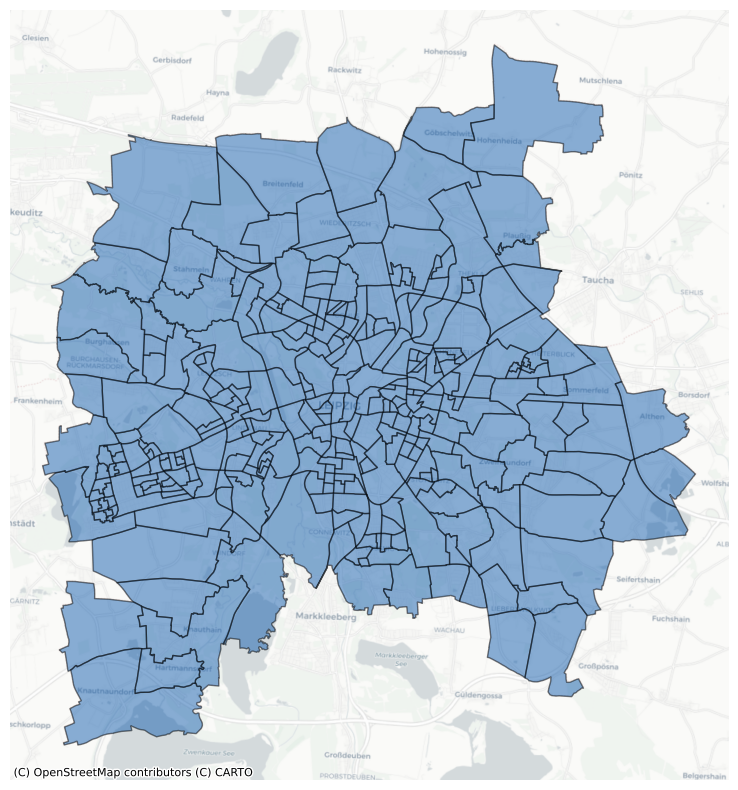

In [6]:

### Pip install contextily if not on your system
### !pip install contextily

import contextily as cx
import matplotlib.pyplot as plt

cleveland_neighborhoods = leipzig.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))  # Adjust figure size as needed

leipzig.plot(ax=ax,
                         facecolor='#155FAF',
                         edgecolor='black',
                         linewidth=1,
                         alpha=.5)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron,
                crs=leipzig.crs.to_string(),
                zoom=12)

ax.set_axis_off()
plt.show()

To add neighborhood labels we can add a piece of code to the above block at line 14.

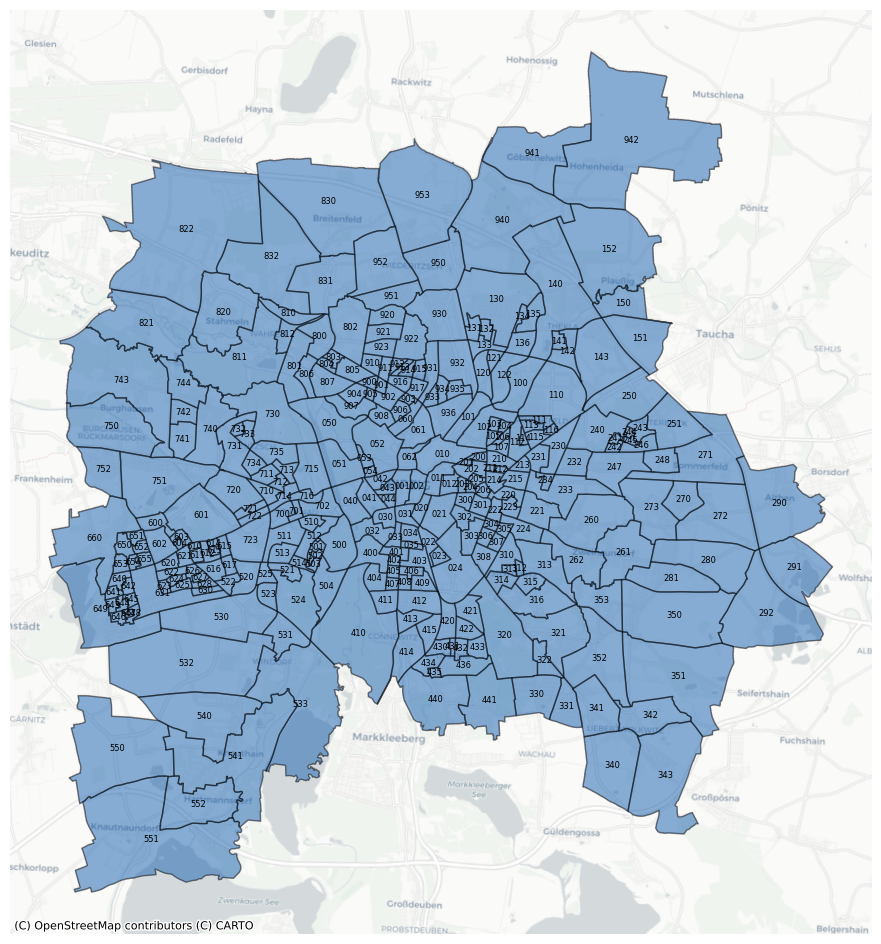

In [8]:

fig, ax = plt.subplots(figsize=(12, 12))

leipzig.plot(ax=ax,
                            facecolor='#155FAF',
                            edgecolor='black',
                            linewidth=1,
                            alpha=.5)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron,
                crs=leipzig.crs.to_string(),
                zoom=12)

### Added this code block
for idx, row in leipzig.iterrows():
     centroid = row['geometry'].centroid
     ax.text(centroid.x, centroid.y, row['STB'],
             ha='center', va='center', fontsize=6)
     
ax.set_axis_off()
plt.show()

Some of these labels look good, others, not so much, so let’s make a few tweaks to the code to improve our map.

The first thing I want to do is to make one word per line so the long neighborhood names don’t spill over their boundaries.

In [9]:
temp_column = cleveland_neighborhoods.STB
temp_column1 = temp_column.str.replace('-', '-\n')
leipzig['STB'] = temp_column1.str.replace(' ', '\n')
print(leipzig['STB'].head())

0    001
1    002
2    010
3    011
4    012
Name: STB, dtype: object


Now I will create a new function add_centroid_coordsthat calculates the centroids and adds that column to my data frame. Then I am going to find the Cuyahoga Valley label and move it up and to the right. The Downtown label will be moved straight down.

In [ ]:
def add_centroid_coords(row):
    """Calculates and adds centroid coordinates as a tuple to a new column."""
    centroid = row.geometry.centroid
    return (centroid.x, centroid.y)

# Preprocess the DataFrame
leipzig['centroid_coords'] = leipzig.apply(add_centroid_coords, axis=1)

fig, ax = plt.subplots(figsize=(12, 12)) 

cleveland_neighborhoods.plot(ax=ax,
                            facecolor='#155FAF',
                            edgecolor='black',
                            linewidth=1,
                            alpha=.5)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron,
                crs=leipzig.crs.to_string(),
                zoom=12)

for idx, row in cleveland_neighborhoods.iterrows():
    centroid = row['centroid_coords'] 

    # Adjust "Cuyahoga Valley" name
    if row['STB'] == 'Cuyahoga\nValley':
        centroid = (centroid[0] + 950, centroid[1] + 850) # Adjust coordinates up and to the right.

    # Adjust "Downtown" name
    if row['SPANM'] == 'Downtown':
        centroid = (centroid[0], centroid[1] - 500) # Adjust coordinates down

    ax.text(centroid[0], centroid[1], row['SPANM'],  
            ha='center', va='center', fontsize=6)  


ax.set_axis_off()
plt.show()